In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# /content/drive/MyDrive/Colab Notebooks/SMILES-2024/CreditScorer/
PATH_PREFIX = '/content/drive/MyDrive/Colab Notebooks/SMILES-2024/CreditScorer' # for Colab
# PATH_PREFIX = '/trinity/home/team08/workspace' # for server https://compute.summer.appliedai.tech/
# PATH_PREFIX = './../..'

DATA_PATH = PATH_PREFIX + "/data"

TRAIN_DATA_PATH = DATA_PATH + "/train_data/"
TEST_DATA_PATH = DATA_PATH + "/data/test_data/"

TRAIN_DATA_parts_PATH = DATA_PATH + "/train_data_parts/"
TEST_DATA_parts_PATH = DATA_PATH + "/test_data_parts/"

TRAIN_TARGET_PATH = DATA_PATH + "/train_target.csv"


In [3]:
import sys
sys.path.append(PATH_PREFIX)

In [4]:
from utils import read_parquet_dataset_from_local

0. Читаем X,y

In [5]:
# читаем данные X
num_parts_to_read=1 # 6
df = read_parquet_dataset_from_local(TRAIN_DATA_parts_PATH, start_from=0, num_parts_to_read=num_parts_to_read)

Reading dataset with pandas:   0%|          | 0/1 [00:00<?, ?it/s]

file-chunk = /content/drive/MyDrive/Colab Notebooks/SMILES-2024/CreditScorer/data/train_data_parts/train_data_0__part_0.pqt


In [22]:
X61 = df # df.to_numpy()
# df60 = df.iloc[:, 1:]
X60 = X61.iloc[:, 1:]
# X = X60
print( X60.shape )
X10 = X60.iloc[:, :10]
X20 = X60.iloc[:, :20]
X15 = X60.iloc[:, :15]
X30 = X60.iloc[:, :30]
X5 = X60.iloc[:, :5]
print( X5.shape )

(160592, 60)
(160592, 5)


In [7]:
import pandas as pd

# read y=target
y_ = pd.read_csv(TRAIN_TARGET_PATH)
y = y_.iloc[df[:]['id']]['flag']
print( y.shape )

(160592,)


0. describe, info

In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,160592.0,10438.544174,6005.738265,0.0,5238.75,10413.0,15618.25,20832.0
rn,160592.0,6.387348,5.000366,1.0,3.00,5.0,9.00,43.0
pre_since_opened,160592.0,9.213597,5.772806,0.0,4.00,8.0,14.00,19.0
pre_since_confirmed,160592.0,7.989844,4.514857,0.0,4.00,8.0,11.00,17.0
pre_pterm,160592.0,8.353779,5.245763,0.0,4.00,8.0,13.00,17.0
...,...,...,...,...,...,...,...,...
enc_loans_credit_status,160592.0,2.695938,0.487954,0.0,2.00,3.0,3.00,6.0
enc_loans_credit_type,160592.0,3.352191,1.053747,0.0,3.00,4.0,4.00,5.0
enc_loans_account_cur,160592.0,1.002042,0.055984,0.0,1.00,1.0,1.00,3.0
pclose_flag,160592.0,0.166185,0.372248,0.0,0.00,0.0,0.00,1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160592 entries, 0 to 160591
Data columns (total 61 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   id                             160592 non-null  int64
 1   rn                             160592 non-null  int64
 2   pre_since_opened               160592 non-null  int64
 3   pre_since_confirmed            160592 non-null  int64
 4   pre_pterm                      160592 non-null  int64
 5   pre_fterm                      160592 non-null  int64
 6   pre_till_pclose                160592 non-null  int64
 7   pre_till_fclose                160592 non-null  int64
 8   pre_loans_credit_limit         160592 non-null  int64
 9   pre_loans_next_pay_summ        160592 non-null  int64
 10  pre_loans_outstanding          160592 non-null  int64
 11  pre_loans_total_overdue        160592 non-null  int64
 12  pre_loans_max_overdue_sum      160592 non-null  int64
 13 

### 1. Матрица корреляций

In [22]:
corr60 = df60.corr()
corr60

,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
rn,1.000000,-0.029675,-0.030776,-0.016886,-0.015567,0.038701,0.107491,0.007639,0.008694,-0.005246,...,0.107316,0.107946,0.108459,0.086111,-0.016361,-0.138543,0.085170,-0.029408,0.005572,0.090905
pre_since_opened,-0.029675,1.000000,0.000592,-0.027026,0.014475,-0.027059,0.019167,-0.000207,0.008571,0.002138,...,-0.016398,-0.018143,-0.022064,-0.022520,-0.001465,-0.026835,-0.013687,0.008804,0.015247,0.010475
pre_since_confirmed,-0.030776,0.000592,1.000000,-0.012120,0.033123,0.026034,-0.112590,-0.006564,-0.011958,0.006272,...,-0.023682,-0.022163,-0.020759,-0.018756,-0.006093,0.048283,0.103730,0.010207,0.027174,-0.037049
pre_pterm,-0.016886,-0.027026,-0.012120,1.000000,0.037672,0.223092,-0.044662,-0.017357,-0.018381,-0.000533,...,0.149345,0.148939,0.148612,0.062603,-0.037157,0.111686,0.078694,0.008565,-0.370527,-0.189651
pre_fterm,-0.015567,0.014475,0.033123,0.037672,1.000000,0.072614,0.053063,-0.007495,-0.009647,0.012406,...,-0.196971,-0.190742,-0.183293,-0.115261,-0.004571,-0.002075,0.040373,0.021141,0.028377,-0.036538
pre_till_pclose,0.038701,-0.027059,0.026034,0.223092,0.072614,1.000000,-0.081063,-0.003187,-0.030215,0.011478,...,0.059220,0.062210,0.066481,-0.028189,-0.063605,0.101449,0.110031,0.004736,-0.523075,-0.251570
pre_till_fclose,0.107491,0.019167,-0.112590,-0.044662,0.053063,-0.081063,1.000000,0.014664,0.004975,0.038041,...,-0.073784,-0.073716,-0.074573,-0.043770,0.019351,-0.215491,0.001372,-0.024286,0.185051,0.335537
pre_loans_credit_limit,0.007639,-0.000207,-0.006564,-0.017357,-0.007495,-0.003187,0.014664,1.000000,0.009817,0.051413,...,0.027075,0.027305,0.028430,0.031770,-0.058242,0.008694,0.084002,-0.023929,0.026029,0.005683
pre_loans_next_pay_summ,0.008694,0.008571,-0.011958,-0.018381,-0.009647,-0.030215,0.004975,0.009817,1.000000,-0.059338,...,0.019160,0.017959,0.016977,0.058004,0.006046,-0.098955,0.016304,-0.009800,0.043538,0.011358
pre_loans_outstanding,-0.005246,0.002138,0.006272,-0.000533,0.012406,0.011478,0.038041,0.051413,-0.059338,1.000000,...,-0.024209,-0.024723,-0.025454,-0.011410,-0.107232,-0.019713,0.108196,-0.002706,0.033192,0.032453


In [22]:
corr60.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3819: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3820: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
rn,1.000000,-0.029675,-0.030776,-0.016886,-0.015567,0.038701,0.107491,0.007639,0.008694,-0.005246,nan,-0.027263,0.087653,0.007015,0.019365,-0.000968,-0.003805,-0.007178,0.025335,0.053913,0.078291,0.062478,0.070869,-0.103425,-0.026421,0.060319,-0.141233,0.029073,0.066801,-0.003362,0.064637,0.107494,0.123680,0.126714,0.131156,0.119122,0.117221,0.115739,0.115306,0.106843,0.103534,0.095250,0.094241,0.096267,0.098281,0.100865,0.102245,0.103525,0.105087,0.106010,0.107316,0.107946,0.108459,0.086111,-0.016361,-0.138543,0.085170,-0.029408,0.005572,0.090905
pre_since_opened,-0.029675,1.000000,0.000592,-0.027026,0.014475,-0.027059,0.019167,-0.000207,0.008571,0.002138,nan,0.004379,-0.026082,-0.000493,-0.006654,0.002023,-0.002950,-0.000023,0.003619,0.015279,-0.014553,-0.017518,-0.023336,-0.025543,0.000128,0.004551,-0.029028,0.001075,0.008449,0.037878,0.062075,0.091162,0.128714,0.159066,0.158411,0.137683,0.120392,0.111270,0.100167,0.090186,0.071966,0.048372,0.028514,0.014711,0.001435,-0.009614,-0.018127,-0.021623,-0.020071,-0.017436,-0.016398,-0.018143,-0.022064,-0.022520,-0.001465,-0.026835,-0.013687,0.008804,0.015247,0.010475
pre_since_confirmed,-0.030776,0.000592,1.000000,-0.012120,0.033123,0.026034,-0.112590,-0.006564,-0.011958,0.006272,nan,0.002153,-0.035565,0.006762,-0.002592,-0.001937,0.002694,-0.001819,0.033751,-0.026790,-0.008218,-0.003354,-0.005068,0.007753,0.053460,-0.042534,0.013335,-0.060295,-0.036882,-0.025754,-0.018242,-0.015107,-0.015069,-0.017876,-0.021640,-0.028341,-0.027084,-0.026280,-0.021754,-0.027736,-0.027371,-0.033849,-0.031809,-0.029242,-0.027300,-0.026973,-0.026101,-0.026756,-0.025852,-0.024413,-0.023682,-0.022163,-0.020759,-0.018756,-0.006093,0.048283,0.103730,0.010207,0.027174,-0.037049
pre_pterm,-0.016886,-0.027026,-0.012120,1.000000,0.037672,0.223092,-0.044662,-0.017357,-0.018381,-0.000533,nan,0.000333,-0.022018,0.002881,0.034631,-0.000126,0.002160,-0.003289,-0.062895,0.019676,-0.014966,-0.015964,-0.010091,0.060770,-0.050619,0.015734,0.080038,0.067865,0.068369,-0.062996,-0.094172,-0.116230,-0.133051,-0.130932,-0.122933,-0.120315,-0.114650,-0.100419,-0.077447,-0.036165,-0.007706,0.057471,0.101285,0.116915,0.124582,0.132024,0.136392,0.143996,0.148136,0.149547,0.149345,0.148939,0.148612,0.062603,-0.037157,0.111686,0.078694,0.008565,-0.370527,-0.189651
pre_fterm,-0.015567,0.014475,0.033123,0.037672,1.000000,0.072614,0.053063,-0.007495,-0.009647,0.012406,nan,-0.022470,0.004929,-0.014772,-0.023697,0.005355,0.000423,0.002778,-0.043830,-0.046138,-0.038326,-0.040307,-0.040338,-0.005341,0.007099,0.019798,-0.018425,-0.008835,-0.038355,0.006459,-0.059953,-0.089589,-0.110341,-0.102267,-0.074067,-0.088241,-0.111573,-0.156491,-0.207821,-0.315672,-0.369519,-0.344547,-0.331930,-0.310408,-0.288664,-0.268994,-0.251047,-0.226736,-0.211412,-0.202858,-0.196971,-0.190742,-0.183293,-0.115261,-0.004571,-0.002075,0.040373,0.021141,0.028377,-0.036538
pre_till_pclose,0.038701,-0.027059,0.026034,0.223092,0.072614,1.000000,-0.081063,-0.003187,-0.030215,0.011478,nan,-0.026277,0.010358,-0.019578,0.036903,0.005321,-0.003071,0.002949,-0.075474,0.061850,-0.002411,0.00

In [23]:
import numpy as np

In [24]:
ind = np.abs(corr60)>0.1
corr60[ind]

,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
rn,1.000000,NaN,NaN,NaN,NaN,NaN,0.107491,NaN,NaN,NaN,...,0.107316,0.107946,0.108459,NaN,NaN,-0.138543,NaN,NaN,NaN,NaN
pre_since_opened,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pre_since_confirmed,NaN,NaN,1.00000,NaN,NaN,NaN,-0.112590,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.103730,NaN,NaN,NaN
pre_pterm,NaN,NaN,NaN,1.000000,NaN,0.223092,NaN,NaN,NaN,NaN,...,0.149345,0.148939,0.148612,NaN,NaN,0.111686,NaN,NaN,-0.370527,-0.189651
pre_fterm,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,-0.196971,-0.190742,-0.183293,-0.115261,NaN,NaN,NaN,NaN,NaN,NaN
pre_till_pclose,NaN,NaN,NaN,0.223092,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.101449,0.110031,NaN,-0.523075,-0.251570
pre_till_fclose,0.107491,NaN,-0.11259,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.215491,NaN,NaN,0.185051,0.335537
pre_loans_credit_limit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pre_loans_next_pay_summ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pre_loans_outstanding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,-0.107232,NaN,0.108196,NaN,NaN,NaN


<Axes: >

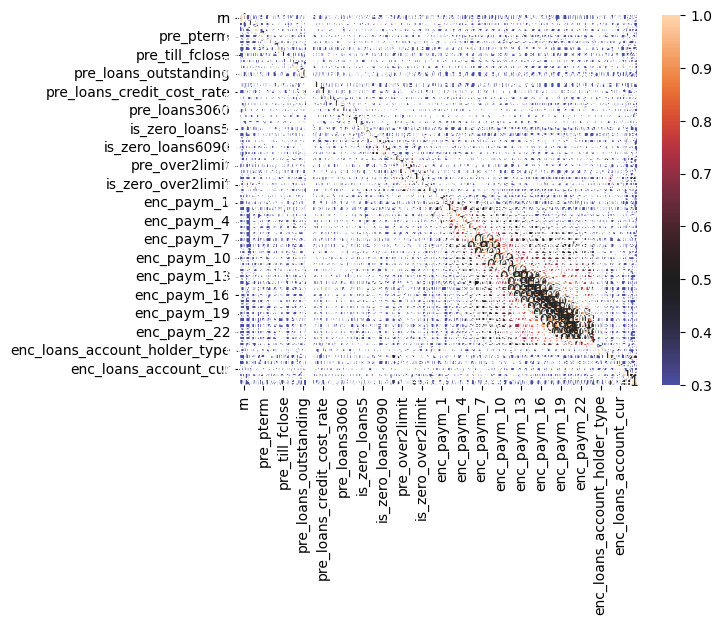

In [29]:
import seaborn as sns
sns.heatmap(np.abs(corr60), annot = True, vmin=0.3, vmax=+1, center = 0.5)
# sns.heatmap(corr60, annot = True, vmin=-0.2, vmax=+0.2, center= 0)

In [ ]:
### Выводы:


### https://habr.com/ru/articles/264915/ описание методов Методы отбора фич

### 2. https://proglib.io/p/postroenie-i-otbor-priznakov-chast-2-feature-selection-2021-09-25

#### 2.1. Методы фильтрации (filter methods)
Выбирают внутренние свойства признаков – они быстрее и менее затратны с точки зрения вычислений, чем методы-оболочки. При работе с данными большой размерности в вычислительном отношении дешевле использовать методы фильтрации.

**Сбор информации (Information Gain, IG)**

Вычисляет уменьшение энтропии в результате преобразования набора данных. Его можно использовать для отбора признаков путем оценки информационного прироста каждой переменной в контексте целевой переменной.


In [8]:
# import pandas as pd
# import numpy as np
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

In [10]:
X = X60
importances = mutual_info_classif(X, y)
# Где df - ваш датасет; X, y – входные и выходные данные соответственно
# ВРЕМЯ ВЫП X = X60 на Colab == 1мин20сек
print(importances)

[1.30704295e-03 3.24604058e-03 3.46002653e-03 2.28609789e-03
 2.96205135e-03 2.53700801e-03 5.09333461e-03 2.84815692e-03
 1.21609074e-02 2.92676451e-02 9.27979104e-06 2.64577046e-02
 6.59300267e-03 4.52291678e-02 2.87368319e-02 3.68614024e-02
 2.93627488e-02 3.64767374e-02 2.65354297e-02 3.17728395e-02
 3.99806818e-02 2.79662619e-02 2.80999285e-02 1.63325598e-02
 3.41594460e-02 4.24389675e-02 3.22295766e-02 4.30910475e-02
 3.16146079e-02 1.08461116e-03 1.26247674e-03 3.69483535e-03
 5.31600775e-03 6.17792978e-03 9.40440153e-03 1.25684647e-02
 1.74870170e-02 2.01380379e-02 2.25132548e-02 2.60500749e-02
 1.85417995e-02 2.94552579e-02 3.06213461e-02 3.00229251e-02
 3.08590331e-02 3.14349620e-02 3.06848375e-02 3.09605420e-02
 3.07404918e-02 2.19649380e-02 3.17111554e-02 3.13311876e-02
 3.10059508e-02 2.12836286e-02 2.44252281e-02 1.90671012e-02
 1.35714196e-02 4.53039962e-02 3.09289880e-03 4.10045313e-03]


In [35]:
print( importances.sum() )

1.2722112141438155


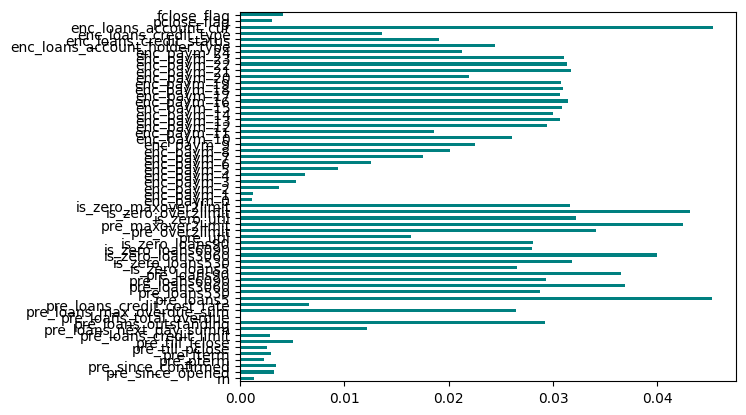

pre_loans5               0.045229
pre_loans3060            0.036861
pre_loans90              0.036477
is_zero_loans3060        0.039981
pre_maxover2limit        0.042439
is_zero_over2limit       0.043091
enc_loans_account_cur    0.045304
dtype: float64


In [14]:
feature_importances = pd.Series(importances, df.columns[1:len(X.columns)+1])
feature_importances.plot(kind='barh', color='teal')
plt.show()

# print(importances)
feature_importances02 = feature_importances[feature_importances>0.035]
print(feature_importances02)


**Критерий Фишера (F-тест)**

Критерий Фишера – один из наиболее широко используемых методов контролируемого выбора признаков. Алгоритм, который мы будем использовать, возвращает ранги переменных на основе оценки критерия в порядке убывания, после чего уже следует их отбор.

In [1]:
# !pip install skfeature-chappers

In [ ]:
### Критерий Фишера (F-тест)
_ = '''
X = X10
# import pandas as pd
# import numpy as np
from skfeature.function.similarity_based import fisher_score
# import matplotlib.pyplot as plt

# Вычисляем критерий
# Где X, y - входные и выходные данные соответственно.
# ranks = fisher_score.fisher_score(X, y) ## ERROR
ranks = fisher_score.fisher_score(X.to_numpy(), y.to_numpy())
# Colab == ПАМЯТЬ исчерпана
print(ranks)
'''
# СБОЙ СЕАНСА

In [ ]:
_ = '''
# Делаем график наших "фич"
# Где df - ваш датасет
feature_importances = pd.Series(ranks, df.columns[0:len(data.columns)])
# feature_importances = pd.Series(ranks, X10)
feature_importances.plot(kind='barh', color='teal')
plt.show()
'''

**Коэффициент корреляции**

Корреляция – это мера линейной связи двух или более переменных. При её помощи мы можем предсказать одну переменную через другую. Логика использования этого метода для выбора характеристик заключается в том, что “хорошие” переменные сильно коррелируют с нашей целью.
Стоит отметить, что переменные должны коррелировать с целевым показателем, но не должны между собой. В примере ниже мы будем использовать корреляцию Пирсона.

<Axes: >

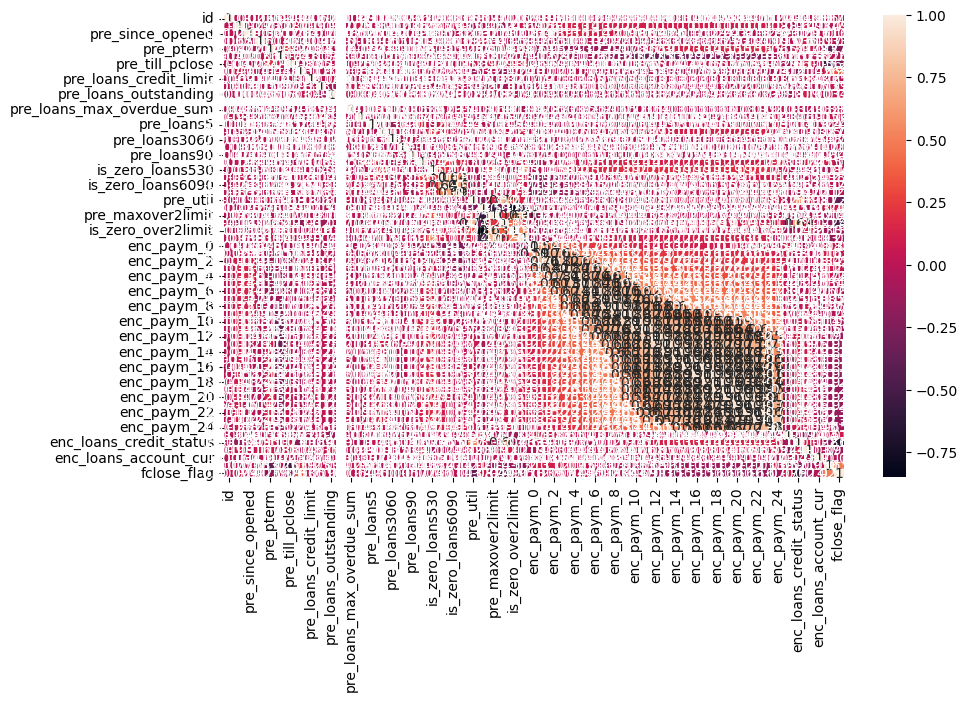

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Матрица корреляции
# Где df - ваш датасет
correlation_matrix = df.corr()

# Выводим признаки на тепловую карту
plt.figure(figsize= (10, 6))
sns.heatmap(correlation_matrix, annot = True)

**Абсолютное отклонение (Mean Absolute Difference, MAD)**

Эта техника позволяет нам вычислить абсолютное отклонение от среднего.

<BarContainer object of 60 artists>

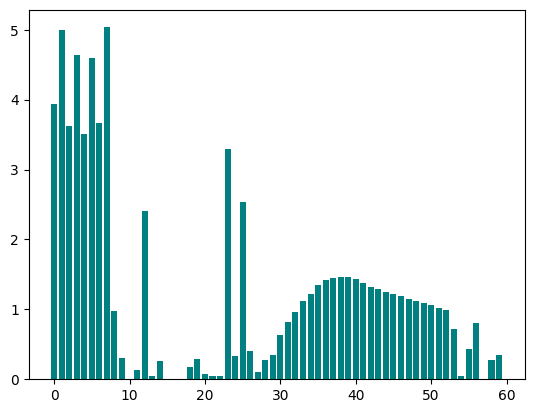

In [ ]:
# import pandas as pd
import numpy as np
# import matplotlib as plt
# Вычисляем MAD
# Где X - входные данные
X_ = X.loc[:, X.columns != 'id'] # .to_numpy()
# X_np = X.to_numpy()
# X_np_ = X_np[:,1:]
mean_absolute_difference = np.sum(np.abs(X_ - np.mean(X_, axis = 0)), axis = 0) / X_.shape[0]

# Наш график признаков
plt.bar(np.arange(X_.shape[1]), mean_absolute_difference, color = 'teal')

### 2.2 Методы обертки (wrapper methods)

Особенность этих методов – поиск всех возможных подмножеств признаков и оценка их качества путем “прогонки” через модель.
Процесс выбора функции основан на конкретном алгоритме машинного обучения, который мы используем. Он следует подходу жадного поиска, оценивая все возможные комбинации функций по определенному критерию. Методы оболочки обычно обеспечивают лучшую точность прогнозирования чем методы фильтрации.

**Прямой отбор признаков**

Это крайне прямолинейный метод, в котором мы начинаем с наиболее эффективной переменной по отношению к цели. Затем мы выбираем другую переменную, которая дает лучшую производительность в сочетании с первой. Этот процесс продолжается до тех пор, пока не будет достигнут заданный критерий.

In [29]:
X = X10
print(X.shape)
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector

lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=42, n_jobs=-1, max_iter=50)
lr.fit(X, y)
ffs = SequentialFeatureSelector(lr, k_features='best', forward = True, n_jobs=-1)
ffs.fit(X, y)
### ВРЕМЯ ВЫП X=X61 Colab == 1.5ч и повисло
### ВРЕМЯ ВЫП X=X5 Colab == 15сек
### ВРЕМЯ ВЫП X=X10 Colab == 1мин25сек
# X, y – входные и выходные данные соответственно.

(160592, 10)


SequentialFeatureSelector(estimator=LogisticRegression(class_weight='balanced',
                                                       max_iter=50, n_jobs=-1,
                                                       random_state=42),
                          k_features=(1, 10), n_jobs=-1, scoring='accuracy')

In [30]:
# X_train – входные данные с обучающейся выборки,
# y_pred – выходные данные предиктора
features = list(ffs.k_feature_names_)
print(features)
print(X[features])
# features = list(map(int, features))
y_pred = lr.predict( X[features] ) ## ERROR

['pre_loans_outstanding']
        pre_loans_outstanding
0                           3
1                           3
2                           5
3                           3
4                           3
...                       ...
160587                      3
160588                      3
160589                      3
160590                      2
160591                      3

[160592 rows x 1 columns]


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- pre_fterm
- pre_loans_credit_limit
- pre_loans_next_pay_summ
- pre_pterm
- pre_since_confirmed
- ...


**Последовательный отбор признаков**

Этот метод работает прямо противоположно методу прямого выбора характеристик. Здесь мы начинаем со всех доступных функций и строим модель. Затем мы используем переменную из модели, которая дает наилучшее значение меры оценки. Этот процесс продолжается до тех пор, пока не будет достигнут заданный критерий.

In [17]:
X = X20
print(X.shape)
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector

lr_s = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=42, n_jobs=-1, max_iter=50)
lr_s.fit(X, y)
### ВРЕМЯ ВЫП Colab == 2сек

(160592, 20)


LogisticRegression(class_weight='balanced', max_iter=50, n_jobs=-1,
                   random_state=42)

In [18]:
bfs = SequentialFeatureSelector(lr_s, k_features=5, forward = False, n_jobs=-1)
bfs.fit(X, y)
features = list(bfs.k_feature_names_)
### ВРЕМЯ ВЫП Colab X=X5 == 7сек
### ВРЕМЯ ВЫП Colab X=X10 == 1мин30сек
### ВРЕМЯ ВЫП Colab X=X20 == UserWarning: A worker stopped

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [19]:
features

['pre_loans_total_overdue',
 'pre_loans5',
 'pre_loans3060',
 'pre_loans6090',
 'pre_loans90']

In [16]:
# features = list(map(int, features))
lr_s.fit(X[features], y)
y_pred = lr_s.predict(X[features])



**Исчерпывающий выбор признаков**

Это самый надежный метод выбора функций из всех существующих. Его суть – оценка каждого подмножества функций методом перебора. Это означает, что метод пропускает все возможные комбинации переменных через алгоритм и возвращает наиболее эффективное подмножество.

In [21]:
X=X5
print(X.shape)
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestClassifier

# создаем ExhaustiveFeatureSelector объект.
efs = ExhaustiveFeatureSelector(RandomForestClassifier(),
        min_features=4,
        max_features=8,
        scoring='roc_auc',
        cv=2)
efs = efs.fit(X, y)
# выводим выбранные признаки
selected_features = X.columns[list(efs.best_idx_)]
print(selected_features)
# выводим финальную оценку прогнозирования.
print(efs.best_score_)

### ВРЕМЯ ВЫП Colab X=X10 == 20мин__сек и я принудительно остановил

(160592, 5)


AttributeError: max_features must be smaller than 6 and larger than 0

**Рекурсивное исключение признаков**

Сначала модель обучается на начальной выборке признаков, и важность каждой функции определяется либо с помощью атрибута coef_ или feature_importances_. Затем наименее важные “фичи” удаляются из текущего набора. Процедура рекурсивно повторяется для сокращенного набора до тех пор, пока в конечном итоге не будет достигнуто желаемое количество признаков для выбора.

In [24]:
X = X60
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=42, n_jobs=-1, max_iter=50)
rfe = RFE(lr, n_features_to_select=7)
rfe.fit(X, y)
y_pred = rfe.predict(X)

### ВРЕМЯ ВЫП Colab X=X10 == 7сек
### ВРЕМЯ ВЫП Colab X=X20 == 30сек
### ВРЕМЯ ВЫП Colab X=X30 == 48сек
### ВРЕМЯ ВЫП Colab X=X60 == 2мин

In [25]:
print( rfe.__dict__ )

{'estimator': LogisticRegression(class_weight='balanced', max_iter=50, n_jobs=-1,
                   random_state=42), 'n_features_to_select': 7, 'step': 1, 'importance_getter': 'auto', 'verbose': 0, 'feature_names_in_': array(['rn', 'pre_since_opened', 'pre_since_confirmed', 'pre_pterm',
       'pre_fterm', 'pre_till_pclose', 'pre_till_fclose',
       'pre_loans_credit_limit', 'pre_loans_next_pay_summ',
       'pre_loans_outstanding', 'pre_loans_total_overdue',
       'pre_loans_max_overdue_sum', 'pre_loans_credit_cost_rate',
       'pre_loans5', 'pre_loans530', 'pre_loans3060', 'pre_loans6090',
       'pre_loans90', 'is_zero_loans5', 'is_zero_loans530',
       'is_zero_loans3060', 'is_zero_loans6090', 'is_zero_loans90',
       'pre_util', 'pre_over2limit', 'pre_maxover2limit', 'is_zero_util',
       'is_zero_over2limit', 'is_zero_maxover2limit', 'enc_paym_0',
       'enc_paym_1', 'enc_paym_2', 'enc_paym_3', 'enc_paym_4',
       'enc_paym_5', 'enc_paym_6', 'enc_paym_7', 'enc_paym_8',


In [28]:
features = list(rfe.feature_names_in_[rfe.support_])
print(features)

['pre_loans3060', 'is_zero_loans5', 'is_zero_loans530', 'is_zero_loans3060', 'is_zero_loans6090', 'is_zero_util', 'enc_paym_2']


In [ ]:
sum( y_pred - y )

27833

#### 2.3. Встроенные методы (embedded methods)
Эти методы включают в себя преимущества первых двух, а также уменьшают вычислительные затраты. Отличительной особенностью встроенных методов является извлечение “фич” на этапе конкретной итерации.

**Регуляризация LASSO (L1)**

Регуляризация состоит в добавлении штрафа (penalty) к различным параметрам модели во избежание чрезмерной подгонки. При регуляризации линейной модели штраф применяется к коэффициентам, умножающим каждый из предикторов. Lasso-регуляризация обладает свойством, позволяющим уменьшить некоторые коэффициенты до нуля. Следовательно, такие “фичи” можно будет просто удалить из модели.

In [40]:
X = X60

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Устанавливаем наш параметр регуляризации C=1
logistic = LogisticRegression(C=1, penalty="l1", solver='liblinear', random_state=7).fit(X, y)
# Где X, y - входные и выходные данные соответственно.
model = SelectFromModel(logistic, prefit=True)

X_new = model.transform(X)
### ВРЕМЯ ВЫП Colab X=X20 == 20сек
### ВРЕМЯ ВЫП Colab X=X30 == 10сек
### ВРЕМЯ ВЫП Colab X=X60 == 10сек

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [32]:
print(X_new.shape)

(160592, 19)


In [30]:
# Выбираем нужные нам столбцы из датасета без нулевых данных
# Где “selected_features” - предварительно выбранные нами признаки (см. по предыдущим методам)
selected_columns = selected_features.columns[selected_features.var() != 0]
print(selected_columns)

NameError: name 'selected_features' is not defined

**Метод с использованием Случайного Леса (Random Forest Importance)**

Стратегии на основе дерева, используемые случайными лесами, естественным образом ранжируются по тому, насколько хорошо они улучшают чистоту модели в плане данных. Таким образом, “обрезая” деревья ниже определенного коэффициента, мы можем подобрать наиболее важные признаки.

[1.47046060e-01 6.68113797e-02 7.50256209e-02 5.27837364e-02
 4.60439754e-02 4.91684469e-02 4.66322053e-02 1.08336102e-01
 3.58835608e-02 1.53494975e-02 0.00000000e+00 7.47450961e-03
 6.97294042e-02 1.01694888e-03 2.99110083e-03 2.60573773e-04
 1.47808828e-06 1.82400880e-04 5.55470869e-03 5.76208835e-03
 3.22144157e-03 1.87073146e-03 1.80345614e-03 2.77470244e-02
 1.86540637e-03 7.45381515e-03 5.03713113e-03 1.81782637e-03
 3.90845024e-03 9.99808127e-03 1.07395567e-02 9.96825870e-03
 9.70569243e-03 1.04360647e-02 9.89095086e-03 9.76647386e-03
 8.37521735e-03 7.50804654e-03 7.40868494e-03 7.58022046e-03
 7.18809563e-03 6.36258185e-03 5.29319801e-03 4.44468575e-03
 4.25448213e-03 4.11465758e-03 4.13423770e-03 3.74047854e-03
 3.37438984e-03 3.55482875e-03 3.34964785e-03 3.67229458e-03
 3.76218755e-03 3.98893286e-03 1.37115677e-03 8.37874759e-03
 2.45171951e-02 1.41766330e-03 5.10737775e-03 5.81683179e-03]


<Axes: >

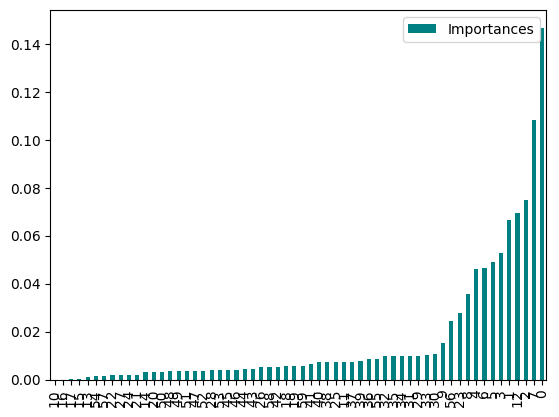

In [35]:
X=X60
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# создаем случайное дерево с вашими гипер параметрами
model = RandomForestClassifier(n_estimators=340)

# Обучаем модель на вашей выборке; Где X, y - входные и выходные данные соответственно.
model.fit(X, y)

# Подбираем самые важные признаки
importances = model.feature_importances_
print(importances)

# Создаем отдельный датасет для визуализации
final_df = pd.DataFrame({"Features" : pd.DataFrame(X).columns, "Importances" : importances})
final_df.set_index('Importances')

# Сортируем их по возрастанию для лучшей визуализации
final_df = final_df.sort_values('Importances')

# Выводим на график
final_df.plot.bar(color = 'teal')
### ВРЕМЯ ВЫП Colab X=X10 == 2мин
### ВРЕМЯ ВЫП Colab X=X15 == 1мин20сек
### ВРЕМЯ ВЫП Colab X=X20 == 1мин30сек
### ВРЕМЯ ВЫП Colab X=X60 == 2мин00сек

<Axes: >

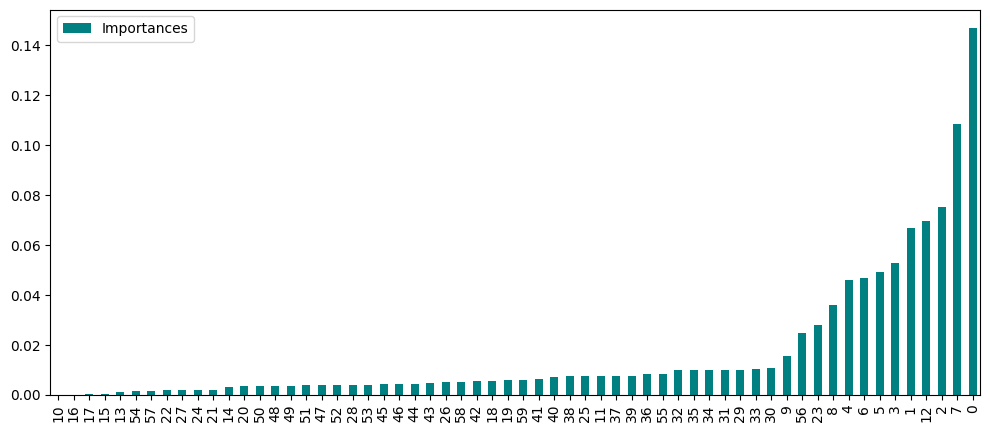

In [37]:
final_df.plot.bar(color = 'teal', figsize=(12,5))

In [1]:
X=X20
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# создаем случайное дерево с вашими гипер параметрами
model = RandomForestClassifier(n_estimators=340)

# Обучаем модель на вашей выборке; Где X, y - входные и выходные данные соответственно.
model.fit(X, y)

# Подбираем самые важные признаки
importances = model.feature_importances_
print(importances)

# Создаем отдельный датасет для визуализации
final_df = pd.DataFrame({"Features" : pd.DataFrame(X).columns, "Importances" : importances})
final_df.set_index('Importances')

# Сортируем их по возрастанию для лучшей визуализации
final_df = final_df.sort_values('Importances')

# Выводим на график
final_df.plot.bar(color = 'teal')
### ВРЕМЯ ВЫП Colab X=X20 == 2мин

NameError: name 'X20' is not defined